# Lab | Data Structuring and Combining Data

# Challenge 1: Combining Data

In this challenge, we will be working with the customer data from an insurance company, as we did in the two previous labs. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv

But this time, we got new data, which can be found in the following 2 CSV files located at the following links: 
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2_clean.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3_clean.csv

Combine the data from the three dataframes into a single dataframe, named "customer_data", using appropriate merging, concatenating, and joining techniques.

Verify that the customer_data dataframe contains all the rows and columns from the three original dataframes.

## Alternative - Bonus

If in the previous lab you created your cleaning and formatting function, or if you want to do it now, instead of using the two clean files provided above, you can use your function to clean and format the data in these two raw files, and work with your clean files instead:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file2.csv
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file3.csv

Observation: 
- One option is to first combine the three datasets and then apply the cleaning function to the new combined dataset
- Another option would be to read the clean file you saved in the previous lab, and just clean the two new files and concatenate the three clean datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [2]:
file_df1 = pd.read_csv('raw.githubusercontent.com_data-bootcamp-v4_data_main_file1.csv')


In [3]:
file_df2 = pd.read_csv("raw.githubusercontent.com_data-bootcamp-v4_data_main_file2_clean.csv")


In [4]:
file_df3 = pd.read_csv("raw.githubusercontent.com_data-bootcamp-v4_data_main_file3_clean.csv")


In [5]:
customer_data = pd.concat([file_df1, file_df2, file_df3], ignore_index=True)
customer_data

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
28151,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
28152,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
28153,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
28154,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


# Challenge 2: Structuring Data

In this challenge, we will continue to work with customer data from an insurance company, but we will use a dataset with more columns, called marketing_customer_analysis.csv, which can be found at the following link:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/marketing_customer_analysis_clean.csv

This dataset contains information such as customer demographics, policy details, vehicle information, and the customer's response to the last marketing campaign. Our goal is to explore and analyze this data by performing data cleaning, formatting, and structuring.

In [6]:
marketing = pd.read_csv('raw.githubusercontent.com_data-bootcamp-v4_data_main_marketing_customer_analysis_clean.csv')

1. You work at the marketing department and you want to know which sales channel brought the most sales in terms of total revenue. Using pivot, create a summary table showing the total revenue for each sales channel (branch, call center, web, and mail).
Round the total revenue to 2 decimal points.  Analyze the resulting table to draw insights.

In [7]:
def lower_case(marketing):
    marketing.columns = [i.lower() for i in marketing.columns]
    return marketing

marketing = lower_case(marketing)

def replace(marketing):
    marketing.columns = ['-'.join(i.split()) for i in marketing]
    return marketing

marketing = replace(marketing)

marketing.drop(columns='unnamed:_0', inplace=True)


marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       10910 non-null  object 
 1   state                          10910 non-null  object 
 2   customer_lifetime_value        10910 non-null  float64
 3   response                       10910 non-null  object 
 4   coverage                       10910 non-null  object 
 5   education                      10910 non-null  object 
 6   effective_to_date              10910 non-null  object 
 7   employmentstatus               10910 non-null  object 
 8   gender                         10910 non-null  object 
 9   income                         10910 non-null  int64  
 10  location_code                  10910 non-null  object 
 11  marital_status                 10910 non-null  object 
 12  monthly_premium_auto           10910 non-null 

In [8]:
marketing["customer"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10910 entries, 0 to 10909
Series name: customer
Non-Null Count  Dtype 
--------------  ----- 
10910 non-null  object
dtypes: object(1)
memory usage: 85.4+ KB


In [9]:
marketing["sales_channel"].unique()

array(['Agent', 'Call Center', 'Branch', 'Web'], dtype=object)

In [10]:
pivot_table = marketing.pivot_table(index='sales_channel', values='monthly_premium_auto', aggfunc='sum')
pivot_table['monthly_premium_auto'] = pivot_table['monthly_premium_auto'].round(2)
print(pivot_table)


               monthly_premium_auto
sales_channel                      
Agent                        386335
Branch                       280953
Call Center                  197970
Web                          151511


2. Create a pivot table that shows the average customer lifetime value per gender and education level. Analyze the resulting table to draw insights.

In [11]:
numerical = marketing.select_dtypes(include=np.number)
categorical = marketing.select_dtypes(include='object')

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'monthly_premium_auto'}>],
       [<Axes: title={'center': 'months_since_last_claim'}>,
        <Axes: title={'center': 'months_since_policy_inception'}>,
        <Axes: title={'center': 'number_of_open_complaints'}>],
       [<Axes: title={'center': 'number_of_policies'}>,
        <Axes: title={'center': 'total_claim_amount'}>,
        <Axes: title={'center': 'month'}>]], dtype=object)

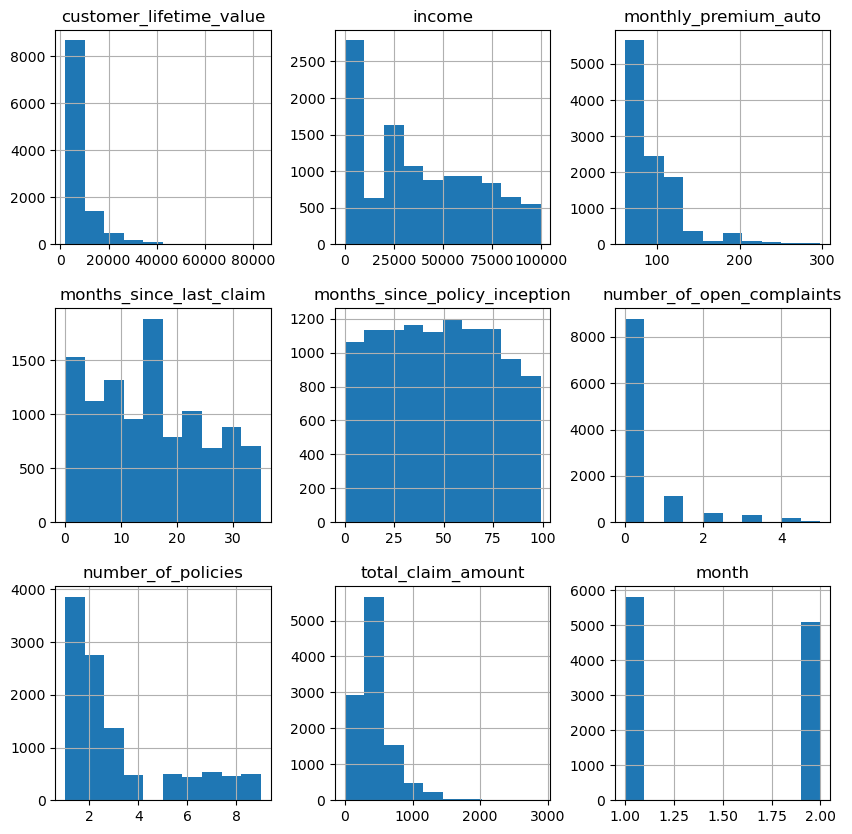

In [12]:
numerical.hist(figsize=(10,10))

In [13]:
correlation_matrix = numerical.drop(columns='total_claim_amount').corr()

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Input Features')

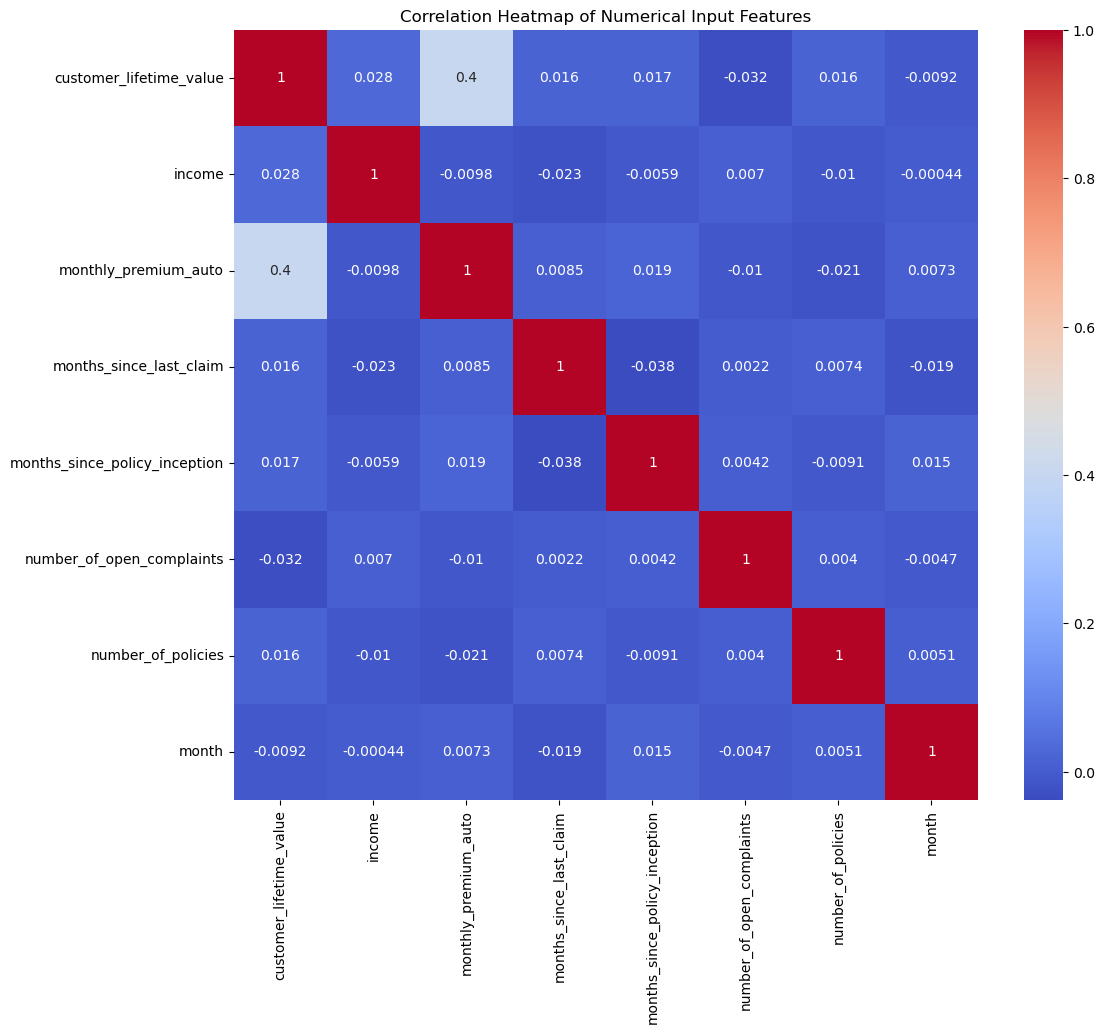

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Input Features')


## Bonus

You work at the customer service department and you want to know which months had the highest number of complaints by policy type category. Create a summary table showing the number of complaints by policy type and month.
Show it in a long format table. 

*In data analysis, a long format table is a way of structuring data in which each observation or measurement is stored in a separate row of the table. The key characteristic of a long format table is that each column represents a single variable, and each row represents a single observation of that variable.*

*More information about long and wide format tables here: https://www.statology.org/long-vs-wide-data/*

In [15]:
# Your code goes here